## Import โมดูลต่างๆ

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!nvidia-smi

Thu Jan 20 02:55:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!wget https://drive.google.com/u/1/uc?export=download&confirm=RbB9&id=1YUlwyD6r-je70-GJXH1y1TZj1QG25gpB -O chest_xray.zip

In [ ]:
! gdown --id 1YUlwyD6r-je70-GJXH1y1TZj1QG25gpB

Downloading...
From: https://drive.google.com/uc?id=1YUlwyD6r-je70-GJXH1y1TZj1QG25gpB
To: /content/Dataset.zip
100% 13.0G/13.0G [02:09<00:00, 100MB/s]


In [ ]:
!unzip -q -o /content/Dataset.zip

In [ ]:
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16,Xception

from imutils import paths
import cv2
import numpy as np
import os


In [ ]:
base_dir = '/content/Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224),  
        batch_size=64,
        class_mode='sparse')


validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=64,
        class_mode='sparse')

Found 16104 images belonging to 3 classes.
Found 2013 images belonging to 3 classes.


##Modeling

In [ ]:
base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential()

In [ ]:
model.add(base_model)

In [ ]:
model.add(Flatten())

In [ ]:
#model.add(Dense(512, activation='relu'))

In [ ]:
#model.add(Dropout(0.2))

In [ ]:
model.add(Dense(256, activation='relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(64, activation='relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(32, activation='relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_10 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
batch_size= 256

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch=16104//batch_size,
          epochs=100,
          validation_data=validation_generator,
          validation_steps= 2013//batch_size)

Epoch 1/100
62/62 [==============================] - 137s 2s/step - loss: 0.1066 - accuracy: 0.9795 - val_loss: 0.1605 - val_accuracy: 0.9865
Epoch 2/100
62/62 [==============================] - 138s 2s/step - loss: 0.0715 - accuracy: 0.9882 - val_loss: 0.0613 - val_accuracy: 0.9875
Epoch 3/100
62/62 [==============================] - 139s 2s/step - loss: 0.0529 - accuracy: 0.9871 - val_loss: 0.0984 - val_accuracy: 0.9812
Epoch 4/100
62/62 [==============================] - 139s 2s/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0322 - val_accuracy: 0.9917
Epoch 5/100
62/62 [==============================] - 139s 2s/step - loss: 0.0535 - accuracy: 0.9871 - val_loss: 0.0790 - val_accuracy: 0.9875
Epoch 6/100
62/62 [==============================] - 146s 2s/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.0599 - val_accuracy: 0.9906
Epoch 7/100
62/62 [==============================] - 140s 2s/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 0.0419 - val_accuracy: 0.9885
Epoch 

In [ ]:
import matplotlib.pyplot as plt

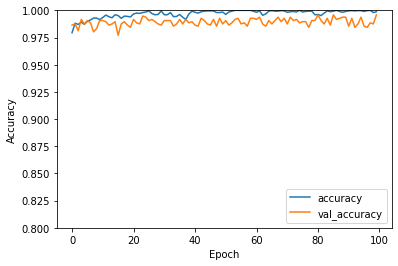

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

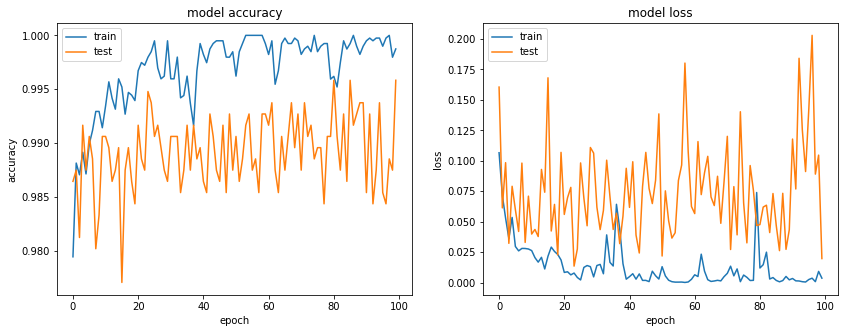

In [ ]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("covid19model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from google.colab import files
files.download('/content/covid19model.h5')

##Evaluate

In [ ]:
#!wget https://www.dropbox.com/s/pkfurmdy6etu6ac/covidtest.zip?dl=0 -O covidtest.zip

In [ ]:
#!unzip -q -o /content/covidtest.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        "/content/Dataset/test",
        target_size=(224, 224),
        batch_size=64,
        class_mode='sparse',
        shuffle = False)

Found 2013 images belonging to 3 classes.


In [ ]:
model = load_model("/content/covid19model.h5")
Y_pred=model.predict(test_generator, steps=len(test_generator), verbose=1)

32/32 [==============================] - 32s 979ms/step


In [ ]:
Y_pred

array([[1.0000000e+00, 0.0000000e+00, 9.6052370e-18],
       [1.0000000e+00, 0.0000000e+00, 1.1172112e-16],
       [1.0000000e+00, 0.0000000e+00, 1.6570207e-28],
       ...,
       [2.8674906e-13, 0.0000000e+00, 1.0000000e+00],
       [8.0532159e-14, 0.0000000e+00, 1.0000000e+00],
       [5.3943277e-16, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
y_pred = np.argmax(Y_pred,axis=1)

In [ ]:
y_pred

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

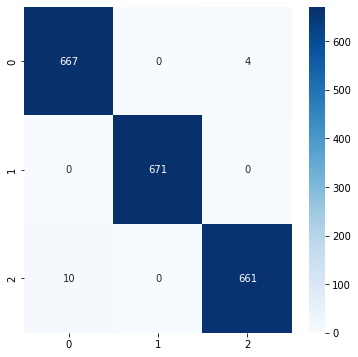

In [ ]:
import seaborn as sns
cf = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize = (6,6))
from sklearn.metrics import confusion_matrix
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

In [ ]:
print('Classification Report')

Classification Report


In [ ]:
target_names = ['COVID19', 'Unknow', 'NORMAL']

In [ ]:
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     COVID19       0.99      0.99      0.99       671
      Unknow       1.00      1.00      1.00       671
      NORMAL       0.99      0.99      0.99       671

    accuracy                           0.99      2013
   macro avg       0.99      0.99      0.99      2013
weighted avg       0.99      0.99      0.99      2013



#Deploy

In [ ]:
model = load_model("covid19model.h5")

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
testfile = "/content/covidlungs-02.jpg"

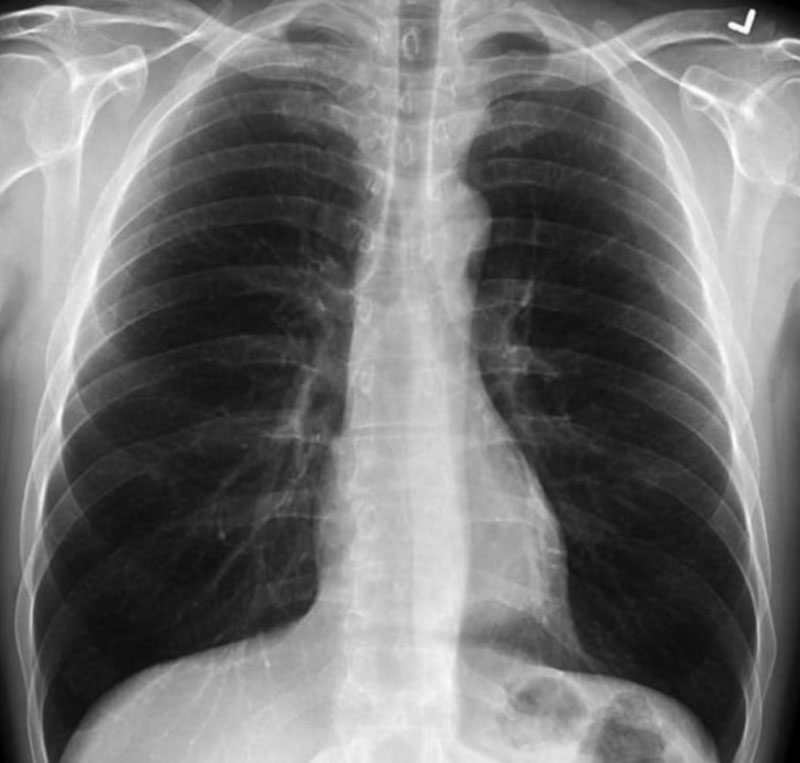

(224, 224, 3)
(1, 224, 224, 3)
[[9.999387e-01 6.022238e-16 6.127806e-05]]
0
Predict : COVID19


In [ ]:
import cv2
image = cv2.imread(testfile)
cv2_imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224),interpolation=cv2.INTER_LINEAR) # size of picture = [224, 224, 3]

print(image.shape)
data = [image] # size of picture arrays = [1, 224, 224, 3]

data = np.array(data) 
data = data/255.0
print(data.shape)

predIdxs = model.predict(data)
print(predIdxs)

result = np.argmax(predIdxs)

print(result)
if result == 0:
  print(f"Predict : COVID19")
if result == 1:
  print(f"Predict : Unkwon")
if result == 2:
  print(f"Predict : NORMAL")


# **Convert .h5 to TensorFlow tflite models**

In [ ]:
import tensorflow as tf
import os 

In [ ]:
# convert keras model to tflite 
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
from keras.models import load_model
model = load_model("/content/covid19model.h5")

TF_LITE_MODEL_FILE_NAME = "tflite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# or using another method

# Save the model.
with open('tflite_model_another.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmphqdekaj7/assets


File size: 181752.172 Kilobytes
INFO:tensorflow:Assets written to: /tmp/tmp3m_o92hv/assets


INFO:tensorflow:Assets written to: /tmp/tmp3m_o92hv/assets


In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])


Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 3]
Output Type: <class 'numpy.float32'>
